### Question.4 Gradient Descent
#### Submitted by:Apurva Nikade

In [353]:
#Load required libraries
import pandas as pd
import numpy as np
import math

In [354]:
#load SAHeart csv file
SAHeart_df = pd.read_csv('SAHeart.csv')

In [355]:
SAHeart_df.head(10)


,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
5,6,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
6,7,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
7,8,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
8,9,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0
9,10,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,1


#### Q.4 a) Encode the categorical variable

In [356]:
SAHeart_df['famhist']= pd.get_dummies(SAHeart_df['famhist'])

In [357]:
SAHeart_df.head(10)


,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,0,60,25.99,57.34,49,1
5,6,132,6.20,6.47,36.21,0,62,30.77,14.14,45,0
6,7,142,4.05,3.38,16.20,1,59,20.81,2.62,38,0
7,8,114,4.08,4.59,14.60,0,62,23.11,6.72,58,1
8,9,114,0.00,3.83,19.40,0,49,24.86,2.49,29,0
9,10,132,0.00,5.80,30.96,0,69,30.11,0.00,53,1


In [358]:
X = (SAHeart_df[['famhist','sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']])

In [359]:
X[0:5]


,famhist,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
0,0,160,12.00,5.73,23.11,49,25.30,97.20,52
1,1,144,0.01,4.41,28.61,55,28.87,2.06,63
2,0,118,0.08,3.48,32.28,52,29.14,3.81,46
3,0,170,7.50,6.41,38.03,51,31.99,24.26,58
4,0,134,13.60,3.50,27.78,60,25.99,57.34,49


In [360]:
Y = np.array(SAHeart_df[['chd']])
#Y = (SAHeart_df[['chd']])
#print(len(Y))

In [361]:
Y[0:5]

array([[1],
       [1],
       [0],
       [1],
       [1]], dtype=int64)

In [362]:
cols_to_Normal = ['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']

X_new= X[cols_to_Normal]
X_new.head(10)

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,49,25.30,97.20,52
1,144,0.01,4.41,28.61,55,28.87,2.06,63
2,118,0.08,3.48,32.28,52,29.14,3.81,46
3,170,7.50,6.41,38.03,51,31.99,24.26,58
4,134,13.60,3.50,27.78,60,25.99,57.34,49
5,132,6.20,6.47,36.21,62,30.77,14.14,45
6,142,4.05,3.38,16.20,59,20.81,2.62,38
7,114,4.08,4.59,14.60,62,23.11,6.72,58
8,114,0.00,3.83,19.40,49,24.86,2.49,29
9,132,0.00,5.80,30.96,69,30.11,0.00,53


#### Q4.b) Normalise the dimension

In [363]:
X_new = X_new[cols_to_Normal].apply( lambda rec:(rec - rec.mean())/rec.std(), axis =0)

In [364]:

type(X_new)

pandas.core.frame.DataFrame

In [365]:
X_new['famhist'] = SAHeart_df['famhist']

In [366]:
X_new.head(10)
list(X_new)

['sbp',
 'tobacco',
 'ldl',
 'adiposity',
 'typea',
 'obesity',
 'alcohol',
 'age',
 'famhist']

In [367]:
X_new = np.array(X_new)
X_new[0:5]

array([[ 1.05741729,  1.8210988 ,  0.47789413, -0.29518321, -0.41801699,
        -0.17659445,  3.27418871,  0.62865426,  0.        ],
       [ 0.27678925, -0.78938174, -0.15950708,  0.41169419,  0.19313443,
         0.67064592, -0.61208112,  1.38161701,  1.        ],
       [-0.99173133, -0.77414124, -0.6085852 ,  0.8833742 , -0.11244128,
         0.73472292, -0.54059729,  0.2179473 ,  0.        ],
       [ 1.54530982,  0.84135214,  0.80625232,  1.62238239, -0.21429985,
         1.41109128,  0.2947424 ,  1.03936121,  0.        ],
       [-0.21110328,  2.16945317, -0.59892761,  0.30501996,  0.70242729,
        -0.01284211,  1.64599115,  0.42330078,  0.        ]])

### Randomly Initialising values of beta coefficient

In [368]:
import random

In [369]:
def initialize_betas(dim):
    b = random.random()
    w = np.random.rand(dim)
    return b,w 




In [370]:
b,w = initialize_betas(X_new.shape[1])
print(b,w)

0.8960157654039139 [ 0.84985226  0.007086    0.34106786  0.66847185  0.41309485  0.51672128
  0.48573459  0.98215475  0.62231596]


In [371]:

w.shape

(9,)

### Q4.d) Define a sigmoid function to predict Y

In [372]:
def sigmoid(b, w ,X_new):
    Z = b + np.matmul(X_new,w)
    return (1.0 / (1 + np.exp(-Z)))  

In [373]:
y_hat = sigmoid(b,w,X_new)

y_hat[0:5]

array([ 0.9762731 ,  0.9693723 ,  0.67157479,  0.9954104 ,  0.90294635])

In [374]:

Y[0:5]

array([[1],
       [1],
       [0],
       [1],
       [1]], dtype=int64)

In [375]:
Y[0:5]

array([[1],
       [1],
       [0],
       [1],
       [1]], dtype=int64)

### Q4.e)Define a function for calculating binary cross entropy loss function( Current cost RMSE)

In [376]:
def get_cost( y, y_hat):
      #return np.sum(np.dot(y.T,np.log(1-y_hat)+ np.dot((1-y).T,np.log(1-y_hat)))) / ( len(y))
        return - np.sum(np.dot(y.T,np.log(1-y_hat)+ np.dot((1-y).T,np.log(1-y_hat)))) / ( len(y))

In [377]:
# Reshape Y
Y=Y.reshape(len(Y), )
current_cost= get_cost(Y,y_hat)
#print(current_cost)
Y.shape

(462,)

### Q4.f)Define a function for updating beta values.

In [378]:
def update_beta (b_0, w_0 , y , y_hat, X_new, alpha):
    db = np.sum( y_hat - y)/ len(y)
    b_0 = b_0 - alpha * db
    dw = np.dot((y_hat - y), X_new)/ len(y)
    w_0 = w_0 - alpha * dw
   
   
    return b_0,w_0
    

In [379]:
alpha = 0.1

type(y_hat)
#(X_new).shape

numpy.ndarray

In [380]:
b,w = update_beta (b,w, Y, y_hat,X_new, alpha)

b.shape

()

In [381]:
#print(b,w)
w

array([ 0.84100575,  0.00854911,  0.33785581,  0.65320828,  0.41470804,
        0.5015432 ,  0.47879732,  0.97375224,  0.59986088])

### Q4.g)Write a code for gradient descent iterations


In [382]:
num_iterations = 500
alpha = 0.5

all_costs = []
b,w = initialize_betas(X_new.shape[1])
print("initial guess of b and w: " , b ,w)

for each_iter in range (num_iterations ):
    y_hat = sigmoid(b, w , X_new)
    current_cost = get_cost (Y, y_hat)
    prev_b = b
    prev_w = w
    b, w = update_beta (prev_b, prev_w, Y, y_hat, X_new, alpha)
    all_costs.append(current_cost)
    if each_iter % 10 == 0:
        print('Iteration: ', each_iter, 'Cost: ', current_cost)
        each_iter += 1
    
#print('b_0:', b_0, 'b_1:',b_1,'b_2:',b_2,'b_3:',b_3,'b_4:', b_4, 'b_5:',b_5,'b_6:',b_6,'b_7:',b_7,'b_8:',b_8,'b_9:',b_9)
print("Final estimates of b and q are: ", b,w)

initial guess of b and w:  0.8353247915901182 [ 0.32558013  0.15019181  0.05624864  0.66679797  0.85000586  0.88265501
  0.18850583  0.17482252  0.92079312]
Iteration:  0 Cost:  174.83606148
Iteration:  10 Cost:  57.919148463
Iteration:  20 Cost:  40.2285676012
Iteration:  30 Cost:  37.291091186
Iteration:  40 Cost:  36.5836687903
Iteration:  50 Cost:  36.3934722125
Iteration:  60 Cost:  36.3572094208
Iteration:  70 Cost:  36.373141613
Iteration:  80 Cost:  36.4074128613
Iteration:  90 Cost:  36.4472532479
Iteration:  100 Cost:  36.4873578874
Iteration:  110 Cost:  36.5253958889
Iteration:  120 Cost:  36.5603611661
Iteration:  130 Cost:  36.5918953885
Iteration:  140 Cost:  36.6199762539
Iteration:  150 Cost:  36.6447583367
Iteration:  160 Cost:  36.6664853232
Iteration:  170 Cost:  36.6854393761
Iteration:  180 Cost:  36.7019114862
Iteration:  190 Cost:  36.7161843512
Iteration:  200 Cost:  36.7285229572
Iteration:  210 Cost:  36.739169943
Iteration:  220 Cost:  36.7483439162
Iteratio

### Q4.i) Use sklearn logistic regression API

In [383]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
lmodel = lreg.fit(X_new, Y)

In [384]:
lmodel.intercept_

array([-0.34607535])

In [385]:
lmodel.coef_

array([[ 0.13271423,  0.36108745,  0.35552458,  0.14227425,  0.37902825,
        -0.2553132 ,  0.00384354,  0.6472839 , -0.88929133]])

In [386]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

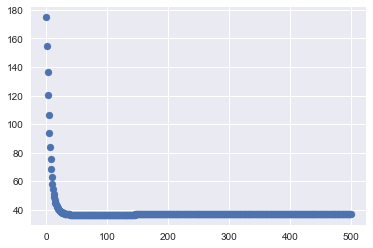

In [387]:
plt.scatter( range(num_iterations), all_costs)

#len(range(each_iter))

### Gradient descent is converging correctly for 500 iterations and with learning rate =0.5

### Q4.h)Plot the cost function for different alpha values, 0.01,0.001,0.0001

In [388]:
# For alpha =0.01
num_iterations = 1000
alpha = 0.01

all_costs = []
b,w = initialize_betas(X_new.shape[1])
print("initial guess of b and w: " , b ,w)

for each_iter in range (num_iterations ):
    y_hat = sigmoid(b, w , X_new)
    current_cost = get_cost (Y, y_hat)
    prev_b = b
    prev_w = w
    b, w = update_beta (prev_b, prev_w, Y, y_hat, X_new, alpha)
    all_costs.append(current_cost)
    if each_iter % 10 == 0:
        print('Iteration: ', each_iter, 'Cost: ', current_cost)
        each_iter += 1
    
#print('b_0:', b_0, 'b_1:',b_1,'b_2:',b_2,'b_3:',b_3,'b_4:', b_4, 'b_5:',b_5,'b_6:',b_6,'b_7:',b_7,'b_8:',b_8,'b_9:',b_9)
print("Final estimates of b and q are: ", b,w)

initial guess of b and w:  0.2318990293496508 [ 0.30010052  0.5063377   0.00982512  0.20447131  0.54885084  0.9358087
  0.84739827  0.43818134  0.51659621]
Iteration:  0 Cost:  120.710265675
Iteration:  10 Cost:  118.135774686
Iteration:  20 Cost:  115.618556625
Iteration:  30 Cost:  113.158495108
Iteration:  40 Cost:  110.755431757
Iteration:  50 Cost:  108.409165488
Iteration:  60 Cost:  106.119451951
Iteration:  70 Cost:  103.886003131
Iteration:  80 Cost:  101.708487125
Iteration:  90 Cost:  99.5865280893
Iteration:  100 Cost:  97.5197063714
Iteration:  110 Cost:  95.5075588266
Iteration:  120 Cost:  93.5495793235
Iteration:  130 Cost:  91.6452194375
Iteration:  140 Cost:  89.7938893315
Iteration:  150 Cost:  87.9949588227
Iteration:  160 Cost:  86.2477586294
Iteration:  170 Cost:  84.551581793
Iteration:  180 Cost:  82.9056852679
Iteration:  190 Cost:  81.3092916694
Iteration:  200 Cost:  79.7615911695
Iteration:  210 Cost:  78.2617435292
Iteration:  220 Cost:  76.8088802525
Itera

In [389]:
lreg = LogisticRegression()
lmodel = lreg.fit(X_new, Y)

In [390]:
lmodel.intercept_

array([-0.34607535])

In [391]:
lmodel.coef_

array([[ 0.13271423,  0.36108745,  0.35552458,  0.14227425,  0.37902825,
        -0.2553132 ,  0.00384354,  0.6472839 , -0.88929133]])

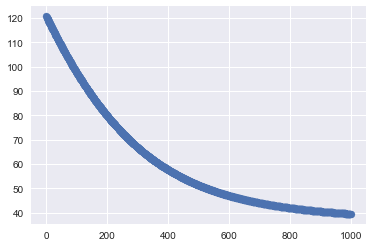

In [392]:
plt.scatter( range(num_iterations), all_costs)

In [393]:
# For alpha =0.001
num_iterations = 1000
alpha = 0.001

all_costs = []
b,w = initialize_betas(X_new.shape[1])
print("initial guess of b and w: " , b ,w)

for each_iter in range (num_iterations ):
    y_hat = sigmoid(b, w , X_new)
    current_cost = get_cost (Y, y_hat)
    prev_b = b
    prev_w = w
    b, w = update_beta (prev_b, prev_w, Y, y_hat, X_new, alpha)
    all_costs.append(current_cost)
    if each_iter % 10 == 0:
        print('Iteration: ', each_iter, 'Cost: ', current_cost)
        each_iter += 1
    
#print('b_0:', b_0, 'b_1:',b_1,'b_2:',b_2,'b_3:',b_3,'b_4:', b_4, 'b_5:',b_5,'b_6:',b_6,'b_7:',b_7,'b_8:',b_8,'b_9:',b_9)
print("Final estimates of b and q are: ", b,w)

initial guess of b and w:  0.7294438154690559 [ 0.59734361  0.67086596  0.86832378  0.27608188  0.7338499   0.28456086
  0.83938735  0.32573262  0.26471948]
Iteration:  0 Cost:  134.371979544
Iteration:  10 Cost:  134.094583401
Iteration:  20 Cost:  133.81776648
Iteration:  30 Cost:  133.541528764
Iteration:  40 Cost:  133.265870231
Iteration:  50 Cost:  132.990790854
Iteration:  60 Cost:  132.716290604
Iteration:  70 Cost:  132.442369444
Iteration:  80 Cost:  132.169027335
Iteration:  90 Cost:  131.896264232
Iteration:  100 Cost:  131.624080087
Iteration:  110 Cost:  131.352474845
Iteration:  120 Cost:  131.081448449
Iteration:  130 Cost:  130.811000836
Iteration:  140 Cost:  130.541131937
Iteration:  150 Cost:  130.271841682
Iteration:  160 Cost:  130.003129992
Iteration:  170 Cost:  129.734996787
Iteration:  180 Cost:  129.46744198
Iteration:  190 Cost:  129.200465481
Iteration:  200 Cost:  128.934067193
Iteration:  210 Cost:  128.668247016
Iteration:  220 Cost:  128.403004845
Itera

In [394]:
lreg = LogisticRegression()
lmodel = lreg.fit(X_new, Y)

In [395]:
lmodel.intercept_

array([-0.34607535])

In [396]:
lmodel.coef_

array([[ 0.13271423,  0.36108745,  0.35552458,  0.14227425,  0.37902825,
        -0.2553132 ,  0.00384354,  0.6472839 , -0.88929133]])

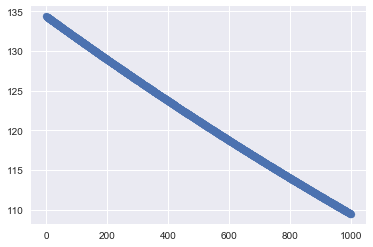

In [397]:
plt.scatter( range(num_iterations), all_costs)

In [398]:
# For alpha =0.0001
num_iterations = 500
alpha = 0.0001

all_costs = []
b,w = initialize_betas(X_new.shape[1])
print("initial guess of b and w: " , b ,w)

for each_iter in range (num_iterations ):
    y_hat = sigmoid(b, w , X_new)
    current_cost = get_cost (Y, y_hat)
    prev_b = b
    prev_w = w
    b, w = update_beta (prev_b, prev_w, Y, y_hat, X_new, alpha)
    all_costs.append(current_cost)
    if each_iter % 10 == 0:
        print('Iteration: ', each_iter, 'Cost: ', current_cost)
        each_iter += 1
    
#print('b_0:', b_0, 'b_1:',b_1,'b_2:',b_2,'b_3:',b_3,'b_4:', b_4, 'b_5:',b_5,'b_6:',b_6,'b_7:',b_7,'b_8:',b_8,'b_9:',b_9)
print("Final estimates of b and q are: ", b,w)

initial guess of b and w:  0.7044580777991666 [ 0.33722566  0.95853115  0.17093125  0.32539402  0.22878796  0.55476354
  0.57966459  0.85406286  0.1538005 ]
Iteration:  0 Cost:  130.909272223
Iteration:  10 Cost:  130.880492717
Iteration:  20 Cost:  130.851719164
Iteration:  30 Cost:  130.822951564
Iteration:  40 Cost:  130.794189918
Iteration:  50 Cost:  130.765434226
Iteration:  60 Cost:  130.736684488
Iteration:  70 Cost:  130.707940705
Iteration:  80 Cost:  130.679202878
Iteration:  90 Cost:  130.650471007
Iteration:  100 Cost:  130.621745091
Iteration:  110 Cost:  130.593025133
Iteration:  120 Cost:  130.564311131
Iteration:  130 Cost:  130.535603087
Iteration:  140 Cost:  130.506901001
Iteration:  150 Cost:  130.478204873
Iteration:  160 Cost:  130.449514705
Iteration:  170 Cost:  130.420830495
Iteration:  180 Cost:  130.392152245
Iteration:  190 Cost:  130.363479955
Iteration:  200 Cost:  130.334813625
Iteration:  210 Cost:  130.306153257
Iteration:  220 Cost:  130.27749885
Iter

In [399]:
lreg = LogisticRegression()
lmodel = lreg.fit(X_new, Y)

In [400]:
lmodel.intercept_

array([-0.34607535])

In [401]:
lmodel.coef_

array([[ 0.13271423,  0.36108745,  0.35552458,  0.14227425,  0.37902825,
        -0.2553132 ,  0.00384354,  0.6472839 , -0.88929133]])

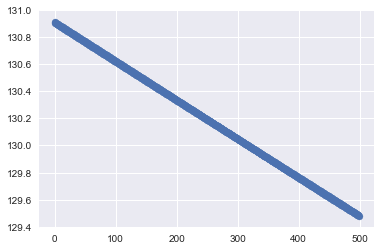

In [402]:
plt.scatter( range(num_iterations), all_costs)